# Index

# 1- Business Understanding

### 1.a - Who is our client and What is the project goal?

In [1]:
# It is highly important to know our client, their business cycle and their targets before starting to
# work on the project because understanding their motivation will help us to put our each actions in context 
# whether it is setting a success metrics or engineering a feature or selecting the model to apply.

#When I got the project documents I assumed that our client could be one the these four :

#1- A car dealer chain who wants to automate pricing for its local stores.
#2- A company who wants to detect cars under the market value to buy and making profit of the margin.
#3- A web-site (like autotrader) who wants to mention the compared-to-market value of a car in each car’s page.
#4- A government institution who wants to detect potential illegal sales (for money laundry) and investigate it.

#I assumed that our customer is #2

### 1.b - Why our client needed the project?

In [2]:
# Our client wants to detect under valued cars, making a more clear prediction of potential profit from each car 
# and to have insights about what it makes the cars overvalued or undervalued 
# to not to fall in overvalued car trap.

### 1.c - Where the project results will be used?

In [3]:
#The Algorithm will be deployed on client website to automate over/under valued car detection.

### 1.d - How the project result will help our client?

In [4]:
# Detecting undervalued cars will let our client to buy cars on cheaper price and sell them on higher price.

# Detecting overvalued cars can be beneficial for two scenarios:
    #1- To avoid buying overpriced cars.
    #2- If client has cars for sale and needs to sell the cars quickly, detecting overpriced cars and bringing
    #   the sale price to optimal level can speed up the sale process.

### 1.e - Which prediction model best fits the business target?

In [5]:
# The client wants to learn exact reasons behind pricing and each feature's effect on it.
# So, it means that our target is to have interpretability over accuracy.
# Which means that we should avoid black-box models.

# I have picked Linear Regression model since it is the most interpretable one 
# among its substitutes.

### 1.f - How to measure model error/success? 

In [6]:
# The most used error measures for Regression models are Root Mean Squared Error (RMSE), Mean Squared Error (MSE)
#  and Mean Absolute Error (MAE).

# I thought a different metric can better fit our targets for two reasons:
   #1- We want interpretability and when we filter down the error metrics accordingly, we have only left with MAE 
   #   since it is more interpretable than RMSE or MSE.
   #2- To break the effects of outliers on success measure.
    
# So, I set the measure as ''The Ratio of Cars predicted with at most 10% error from the actual price'
# So, the goal is to build a model which compress as much as cars within -10% to 10% error interval.



# 2- Data Understanding and Preparation

### 2.a - Importing Libraries

In [7]:
# Data wrangling

import pandas as pd
import numpy as np
from datetime import date
import re

# Visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Feature Selection

from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest,f_regression

# Modeling

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest,f_regression

# Observing all rows/columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Ignoring errors

import warnings
warnings.filterwarnings('ignore')

#Copying data

import copy

#Standardizing data

from sklearn.preprocessing import MinMaxScaler

### 2.b - Having a glance at the data

In [8]:
#Reading data
df= pd.read_csv("car_data_cleaned.csv")

In [9]:
print('The DataFrame has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The DataFrame has 11457 rows and 87 columns


In [10]:
#Overlooking data
df.head(3)

,Unnamed: 0,Car_Make_Model_Style,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Base Curb Weight (lbs),Front Hip Room (in),Front Leg Room (in),Second Shoulder Room (in),Passenger Volume,Second Head Room (in),Front Shoulder Room (in),Second Hip Room (in),Front Head Room (in),Second Leg Room (in),Wheelbase (in),"Track Width, Front (in)","Width, Max w/o mirrors (in)","Track Width, Rear (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",Fuel Economy Est-Combined (MPG),EPA Fuel Economy Est - City (MPG),EPA Fuel Economy Est - Hwy (MPG),Fuel System,First Gear Ratio (:1),Fourth Gear Ratio (:1),Second Gear Ratio (:1),Reverse Ratio (:1),Fifth Gear Ratio (:1),Trans Type,Third Gear Ratio (:1),Final Drive Axle Ratio (:1),Steering Type,Turning Diameter - Curb to Curb,Front Wheel Material,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Other Features,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Roadside Assistance Miles/km,Roadside Assistance Years,Maximum Alternator Capacity (amps),Gears,Net Horsepower,Net Horsepower RPM,Net Torque,Net Torque RPM,Engine Configuration,Engine Class,Displacement (L),Displacement (cc),Rear Tire Width,Front Tire Width,Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
0,0,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,3790.0,55.0,41.6,56.6,104.0,38.3,59.7,49.9,39.6,38.4,108.3,64.2,74.8,64.7,65.7,17.1,24.0,22.0,28.0,Gasoline Direct Injection,5.25,1.6,3.27,3.97,1.3,10.0,2.19,4.17,Rack-Pinion,39.0,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,50000.0,4.0,Unlimited,5.0,70000.0,6.0,50000.0,4.0,NaN,10.0,272.0,6500.0,280.0,1600.0,I,Turbocharged,2.0,122.0,235.0,235.0,19.0,19.0,1.0,1.0,5.0,2019.0
1,1,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,3829.0,55.0,41.6,56.6,104.0,38.3,59.7,49.9,39.6,38.4,108.3,64.2,74.8,64.7,65.7,17.1,24.0,22.0,28.0,Gasoline Direct Injection,5.25,1.6,3.27,3.97,1.3,10.0,2.19,4.17,Rack-Pinion,39.0,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,50000.0,4.0,Unlimited,5.0,70000.0,6.0,50000.0,4.0,NaN,10.0,272.0,6500.0,280.0,1600.0,I,Turbocharged,2.0,122.0,235.0,235.0,19.0,19.0,1.0,1.0,5.0,2019.0
2,2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Small Sport Utility Vehicles 2WD,3821.0,55.0,41.6,56.6,104.0,38.3,59.7,49.9,39.6,38.4,108.3,64.2,74.8,64.7,65.7,17.1,24.0,22.0,27.0,Gasoline Direct Injection,5.25,1.6,3.27,3.97,1.3,10.0,2.19,4.17,Rack-Pinion,39.0,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,50000.0,4.0,Unlimited,5.0,70000.0,6.0,50000.0,4.0,NaN,10.0,272.0,6500.0,280.0,1600.0,I,Turbocharged,2.0,122.0,255.0,255.0,20.0,20.0,1.0,1.0,4.0,2019.0


In [11]:
#Overlooking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11457 entries, 0 to 11456
Data columns (total 87 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          11457 non-null  int64  
 1   Car_Make_Model_Style                11457 non-null  object 
 2   MSRP                                11408 non-null  float64
 3   Style Name                          11457 non-null  object 
 4   Drivetrain                          11457 non-null  object 
 5   Passenger Capacity                  11457 non-null  int64  
 6   Passenger Doors                     11457 non-null  int64  
 7   Body Style                          11457 non-null  object 
 8   EPA Classification                  7794 non-null   object 
 9   Base Curb Weight (lbs)              7516 non-null   float64
 10  Front Hip Room (in)                 8628 non-null   float64
 11  Front Leg Room (in)                 10892

In [12]:
#observation:

#There are many columns with null values.

#action:

#I will create a function to see # of null values and null ratio by columns in detail 
#to decide on necessary touchs.

### 2.c - Dealing with Null Values

In [13]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    table = pd.concat([total, percent], axis=1, keys=['Null Values', 'Null Ratio %'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    table['Types'] = types
    print('{} columns hold Null values'.format(len(data.columns[data.isnull().any()])))
    return(table.sort_values(by="Null Values",ascending=False))

In [14]:
missing_data(df)

52 columns hold Null values


,Null Values,Null Ratio %,Types
Passenger Volume,5542,48.372174,float64
Base Curb Weight (lbs),3941,34.398185,float64
Final Drive Axle Ratio (:1),3916,34.179977,float64
Second Hip Room (in),3744,32.678712,float64
EPA Classification,3663,31.971720,object
"Track Width, Rear (in)",3168,27.651218,float64
"Track Width, Front (in)",3167,27.642489,float64
Maximum Alternator Capacity (amps),3161,27.590120,float64
Front Hip Room (in),2829,24.692328,float64
EPA Fuel Economy Est - Hwy (MPG),1980,17.282011,float64


In [15]:
#observation:

#There are 52 columns with at least 1 Null value.
#Passenger Volume column has the biggest number of null values (5.5k (48.3%))

#action:

#I will directly remove some columns and will do imputatiton other remainings depending on the null ratio.
#I will create a function to decide on the cut-off point.

#### 2.c.1 - Removing Null Values

In [16]:
def missing_ratios(data,threshold1,threshold2,threshold3,threshold4):
    total_row = data.shape[0]
    total_columns = data.shape[1]
    total_null = []
    
    for i in [threshold1,threshold2,threshold3,threshold4]:
        number_of_nulls = len([column for column in data if data[column].isnull().sum()*100 / total_row > i])
        total_null.append(number_of_nulls)
    
    table = pd.DataFrame(total_null,columns=["#"],index=["Columns with > {}% null".format(threshold1),"Columns with > {}% null".format(threshold2),"Columns with > {}% null".format(threshold3),"Columns with > {}% null".format(threshold4)])
    table["%"] = table["#"]*100/total_columns
        
    return table    

In [17]:
missing_ratios(df,0,2,10,25)

,#,%
Columns with > 0% null,52,59.770115
Columns with > 2% null,29,33.333333
Columns with > 10% null,21,24.137931
Columns with > 25% null,8,9.195402


In [18]:
#action:

# I will be removing columns with more than 2% of null values. Since %2 null ratio is easy 
# to deal with using imputation and we would still be keeping 67% of all columns.

In [19]:
#keeping columns with less than 2% null ratio
non_removed_columns = [column for column in df if df[column].count() / len(df) > 0.98]
df = df[non_removed_columns]

#removing all null data points in MSRP since it is our target column.
df.dropna(subset=["MSRP"],inplace=True)

#### 2.c.2 - Imputing Null Values

In [20]:
#observation:

#Some columns with null values are categorial and some are numerical.

#action:

#We should behave differently to impute null values.
#I will use median for numerical values and mode for categorical values for imputation.

In [21]:
def fill_null(data):
    
    num_vars = data.columns[data.dtypes !='object']
    cat_vars = data.columns[data.dtypes =='object']
    
    fill_median = lambda col: col.fillna(col.median())
    fill_mode = lambda col: col.fillna(col.mode()[0])
    
    df[num_vars] = df[num_vars].apply(fill_median)
    df[cat_vars] = df[cat_vars].apply(fill_mode)

In [22]:
fill_null(df)

### 2.d - Feature Extraction

In [23]:
#Overlooking data
df.head(3)

,Unnamed: 0,Car_Make_Model_Style,MSRP,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Wheelbase (in),"Width, Max w/o mirrors (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",Fuel System,Trans Type,Steering Type,Front Wheel Material,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Other Features,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Net Horsepower,Net Horsepower RPM,Net Torque,Net Torque RPM,Engine Configuration,Engine Class,Displacement (L),Rear Tire Width,Front Tire Width,Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year
0,0,2019 Acura RDX Specs: FWD w/Technology Pkg,40600.0,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,108.3,74.8,65.7,17.1,Gasoline Direct Injection,10.0,Rack-Pinion,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,50000.0,4.0,Unlimited,5.0,70000.0,6.0,272.0,6500.0,280.0,1600.0,I,Turbocharged,2.0,235.0,235.0,19.0,19.0,1.0,1.0,5.0,2019.0
1,1,2019 Acura RDX Specs: FWD w/Advance Pkg,45500.0,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,108.3,74.8,65.7,17.1,Gasoline Direct Injection,10.0,Rack-Pinion,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,50000.0,4.0,Unlimited,5.0,70000.0,6.0,272.0,6500.0,280.0,1600.0,I,Turbocharged,2.0,235.0,235.0,19.0,19.0,1.0,1.0,5.0,2019.0
2,2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,43600.0,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,108.3,74.8,65.7,17.1,Gasoline Direct Injection,10.0,Rack-Pinion,Aluminum,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Vehicle Stability Assist Electronic Stability ...,50000.0,4.0,Unlimited,5.0,70000.0,6.0,272.0,6500.0,280.0,1600.0,I,Turbocharged,2.0,255.0,255.0,20.0,20.0,1.0,1.0,4.0,2019.0


In [24]:
#observation:

#Car make is not specifically given in a column. But it can be seen in Car_Make_Model_Style column.

#action:

#I will create a function by using regular expression to extract car make information 
#from Car_Make_Model_Style column.

#### 2.d.1 - Creating new features by using Regular Expression

In [25]:
def make(description):
    return re.split("\s",description)[1]

In [26]:
df['Make'] = df['Car_Make_Model_Style'].apply(make)

In [27]:
df["Make"].unique()

array(['Acura', 'Alfa', 'Aston', 'Audi', 'Bentley', 'BMW', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT',
       'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'INFINITI', 'Jaguar',
       'Jeep', 'Kia', 'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus',
       'Maserati', 'Mazda', 'McLaren', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'smart',
       'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [28]:
#observation:

#Car model information is not specifically given in a column. But it can be seen in Car_Make_Model_Style column

#action:

#I will create a function by using regular expression to extract car model information 
#from Car_Make_Model_Style column.

In [29]:
def model(description):
    x = re.split("\s", description)
    x =(' '.join(x[2:x.index('Specs:')]))
    return x

In [30]:
df['Model'] = df['Car_Make_Model_Style'].apply(model)

In [31]:
df["Model"].unique()

array(['RDX', 'MDX', 'TLX', 'ILX', 'NSX', 'RLX', 'Romeo 4C',
       'Romeo Giulia', 'Romeo Stelvio Quadrifoglio', 'Romeo Stelvio',
       'Romeo 4C Spider', 'Martin DB11', 'Martin Vantage',
       'Martin Vanquish', 'A6', 'A7', 'e-tron', 'Q3', 'Q8', 'S3', 'Q5',
       'S7', 'S4', 'Q7', 'A4', 'S6', 'A5', 'RS 5', 'A3', 'A5 Sportback',
       'SQ5', 'RS 3', 'S5 Coupe', 'A3 Sedan', 'S5 Sportback',
       'A4 allroad', 'A3 Sportback e-tron', 'A3 Cabriolet',
       'S5 Cabriolet', 'RS 7', 'TT', 'A8 L', 'S8 plus', 'TT Coupe',
       'RS 5 Coupe', 'TTS', 'RS 5 Sportback', 'TT Roadster', 'Bentayga',
       'Continental GT', 'Flying Spur', 'Mulsanne', '3-Series', 'X5',
       'X3', 'i8', '8-Series', 'M3', 'X7', '5-Series', 'X1', '4-Series',
       'X4', 'Z4', 'M4', 'M2', 'X6', 'i3', '7-Series', '6-Series',
       '2-Series', 'M5', 'M6', 'X2', 'Encore', 'Enclave', 'Lacrosse',
       'Regal', 'Cascada', 'Envision', 'Regal TourX', 'Regal Sportback',
       'XT4', 'Escalade', 'ATS', 'XT5', 'CT6', 'X

#### 2.d.2 - Creating new features by inter-column calculations

In [32]:
#observation:

#There is the year column which tells us the production year of the car.

#action:

#I will calculate car Age which can be meaningful for the model.

In [33]:
current_year = date.today().year
df["Year"] = df["Year"].astype('int')
df["Age"] = current_year - df["Year"]

In [34]:
#observation:

#There is the Basic Miles/km column I assume it tells us the total miles/km made by the car.

#action:

#I will calculate the yearly usage amount by dividing the total miles/km to the newly created Age column of the car.

In [35]:
df["Yearly_usage"] = df["MSRP"] / df["Age"]

In [36]:
#idea:

#Just before passing to further analysis, we can remove the columns which has little to no meaning
# and columns with too many unique variable.

#action:

#I wil create a function to easily see the amount of unique values each column has.

In [37]:
def number_of_uniques(data):
    total_unique = []
    dtype = []
    column = []
    for i in data.columns:
        number_of_unique = len(data[i].unique())
        total_unique.append(number_of_unique)
        dtype.append(str(data[i].dtype))
        column.append(i)
    
    table = pd.concat([pd.Series(total_unique), pd.Series(dtype)],axis=1, keys=['# of Unique', 'Dtype']).set_index(pd.Series(column))
        
    return (table.sort_values(by='# of Unique',ascending=False))

In [38]:
number_of_uniques(df)

,# of Unique,Dtype
Unnamed: 0,11408,int64
Car_Make_Model_Style,11408,object
Yearly_usage,7352,float64
MSRP,5196,float64
Style Name,4958,object
Other Features,2434,object
Model,416,object
"Height, Overall (in)",376,float64
Net Horsepower,312,float64
Net Torque,275,float64


In [39]:
#observation:

#There are some columns which has no value for the model like "Unnamed: 0" 
#"Car_Make_Model_Style" is unnecessary anymore since we extracted valueable information out of it.
#Some categorical columns like "Style Name" and "Other Features" has too many unique values and doesn't have
#extractable information as we did in "Car_Make_Model_Style" column

#action:

#We will remove "Unnamed: 0", "Car_Make_Model_Style", "Style Name" and "Other Features" from the dataset.

In [40]:
df.drop(columns=["Unnamed: 0","Car_Make_Model_Style","Style Name","Other Features"],inplace=True)

In [41]:
#Changing the MSRP column name as Target
df.rename(columns={"MSRP": "Target"},inplace=True)

### 2.e - Further Analysis and Data Visualisations

In [42]:
#In this section I will look at the variables and their relations with each other and with the Target value.

#action:

#I will create a features_vs_target function to see the relation between features and Target.
#I will create two more functions to help us better catch insights from visuals.

In [43]:
def features_vs_target(feature,df=df,target="Target"):
    pivot = pd.pivot_table(df,index=[feature],values=[target],aggfunc={target:["mean","count"]})[target]
    pivot.rename(columns={"mean": "Sales Price (Avg)","count":"Count"},inplace=True)
    pivot["Sales Price (Avg)"] = pivot["Sales Price (Avg)"].astype('int')
    return pivot.sort_values(by=["Sales Price (Avg)"],ascending=False)  

In [44]:
def show_values_on_horizontal_bars(axs,df):
    l = len(df)
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width()
            _y = p.get_y() + p.get_height()
            value = '{:.0f}%, {:.0f}'.format(p.get_width()*100/l,p.get_width())
            ax.text(p.get_width()*1.03, _y, value, ha="left") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [45]:
def show_values_on_vertical_bars(axs,df):
    l = len(df)
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}%, {:.0f}'.format(p.get_height()*100/l,p.get_height())
            ax.text(_x, _y*1.03, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

#### 2.e.1 - Car Price distribution

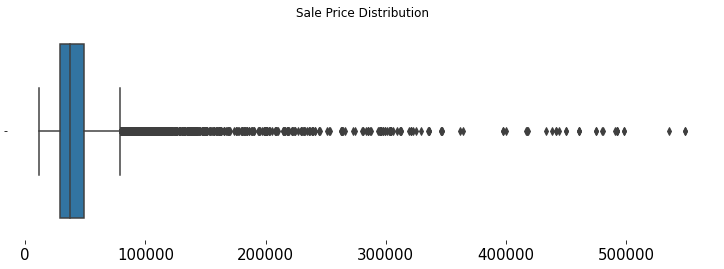

In [46]:
fig = plt.figure(figsize = (28,4))
ax = fig.add_subplot(1, 2, 1)

sns.boxplot(x=df["Target"])
plt.title('Sale Price Distribution')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [47]:
df["Target"].describe()

count     11408.000000
mean      46757.176893
std       39978.632981
min       11990.000000
25%       29120.000000
50%       37442.500000
75%       49196.250000
max      548800.000000
Name: Target, dtype: float64

In [48]:
#observation

#The most expensive car is sale for ≈550k.
#The cheapest car is sale for ≈12k.
#75% of all cars are sold under ≈50k.
#The average sale price is ≈47k.
#Sale price has right-skewed distribution.

#### 2.e.2 - Car Year distribution

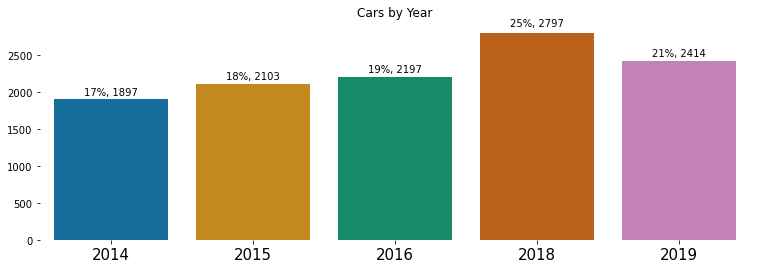

In [49]:
fig = plt.figure(figsize = (28,4))
ax = fig.add_subplot(1, 2, 1)

g = sns.countplot(x=df['Year'],
                  palette='colorblind')

# show values on the bars to make the chart more readable and cleaner 
show_values_on_vertical_bars(ax,df)
plt.title('Cars by Year')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [50]:
#observation

#25% of the cars were produced in 2018. 
#17% of the cars were produced in 2014.
#There are more newer cars than older ones.

#### 2.e.3 - Year vs Sale Price

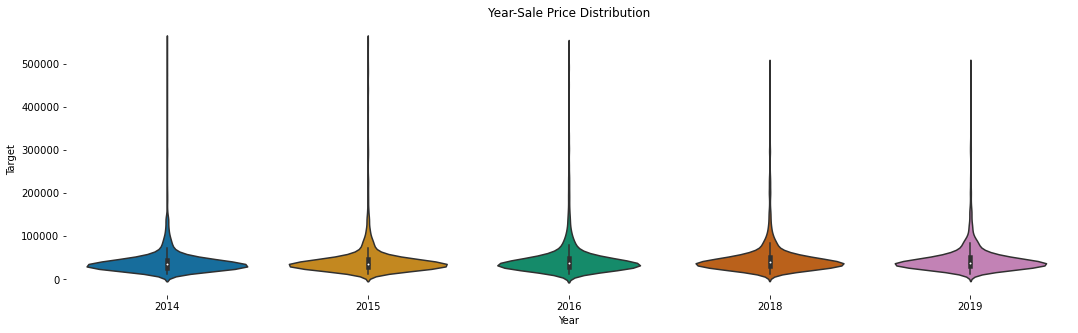

In [51]:
f, ax = plt.subplots(figsize=(18, 5))
fig = sns.violinplot(x="Year", y="Target", data=df, palette='colorblind')
plt.title('Year-Sale Price Distribution')
sns.despine(left=True, bottom=True)


In [52]:
features_vs_target("Year")

,Count,Sales Price (Avg)
Year,,
2018,2797,48872
2019,2414,48663
2016,2197,47818
2015,2103,44304
2014,1897,42703


In [53]:
#observation

#2014 has the biggest price difference between the cheapest and most expensive cars.
#Newest cars (2018) are ≈15% more expensive than the oldest cars (2014) on average.

#### 2.e.4 - Horsepower vs Sale Price 

 
The Correlation score between Horsepower and Sale Price is 0.673858573943209
 


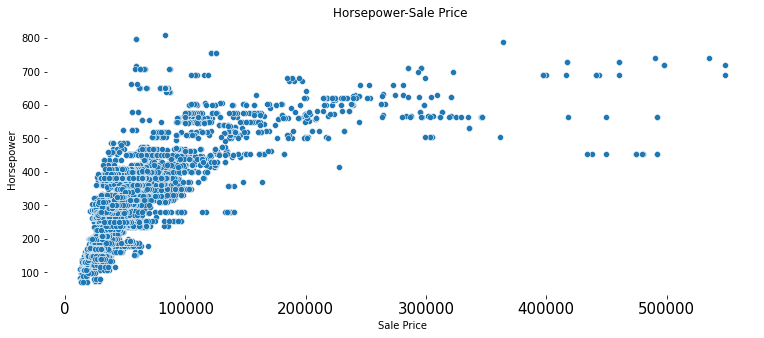

In [54]:
print(" ")
print('The Correlation score between Horsepower and Sale Price is {}'.format(df["Target"].corr(df["Net Horsepower"])))
print(" ")
fig = plt.figure(figsize = (28,5))
ax = fig.add_subplot(1, 2, 1)

sns.scatterplot(data=df, x="Target", y="Net Horsepower")
plt.title('Horsepower-Sale Price ')
sns.despine(left=True, bottom=True)
plt.xlabel('Sale Price')
plt.ylabel('Horsepower')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [55]:
#observation

#There is a strong positive correlation (≈0.68) between Horsepower and Sale Price.

#### 2.e.5 - Basic Miles/km vs Sale Price

 
The Correlation score between Basic Miles/km and Sales Price is 0.5744428500291557
 


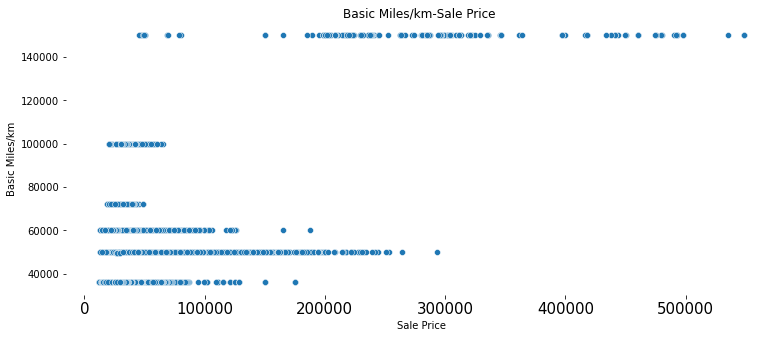

In [56]:
print(" ")
print('The Correlation score between Basic Miles/km and Sales Price is {}'.format(df["Target"].corr(df["Basic Miles/km"])))
print(" ")
fig = plt.figure(figsize = (28,5))
ax = fig.add_subplot(1, 2, 1)

sns.scatterplot(data=df, x="Target", y="Basic Miles/km")
plt.title('Basic Miles/km-Sale Price ')
sns.despine(left=True, bottom=True)
plt.xlabel('Sale Price')
plt.ylabel('Basic Miles/km')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [57]:
#observation

#At the beginning I assumed that the Basic Miles/km column represents the total Miles/km made by the car.
#The chart above proves that I was wrong. Basic Miles/km must be represent something else.
#I will keep Basic Miles/km column in case it has a meaning for the model.

#### 2.e.6 - Engine Class vs Sale Price 

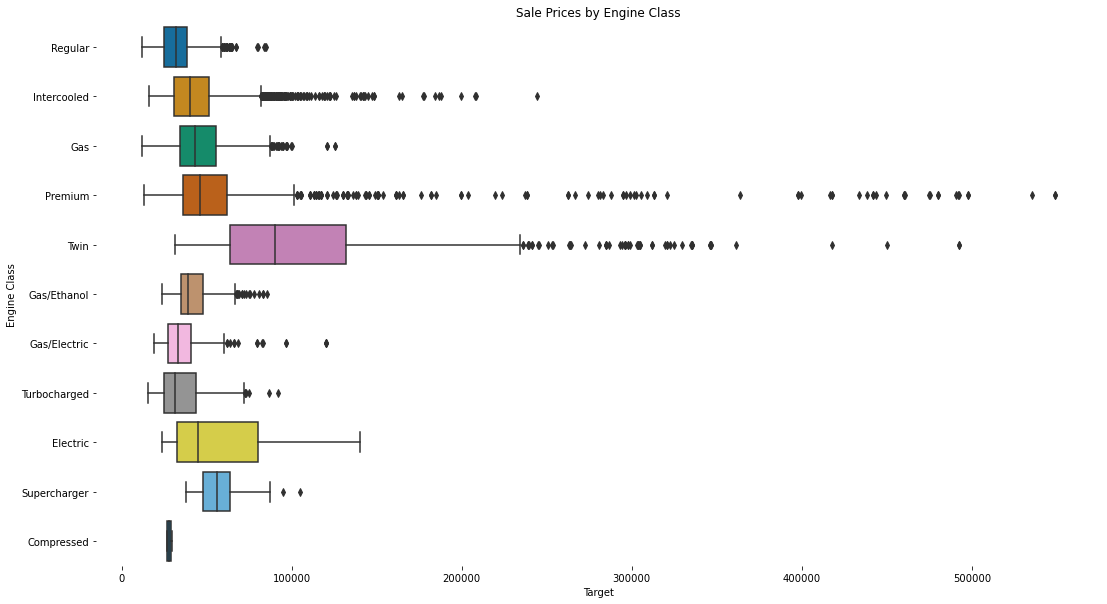

In [58]:
f, ax = plt.subplots(figsize=(18, 10))
fig = sns.boxplot(x="Target", y="Engine Class", data=df,order = df['Engine Class'].value_counts().index, palette='colorblind')
sns.despine(left=True, bottom=True)
plt.title('Sale Prices by Engine Class')
plt.show()

In [59]:
#observation

#The most expensive car has Premium engine.
#Twin engine class has the highest car price on average.
#Regular engine class has the cheapest car price on average.

#### 2.e.7 - Car Brand Distribution

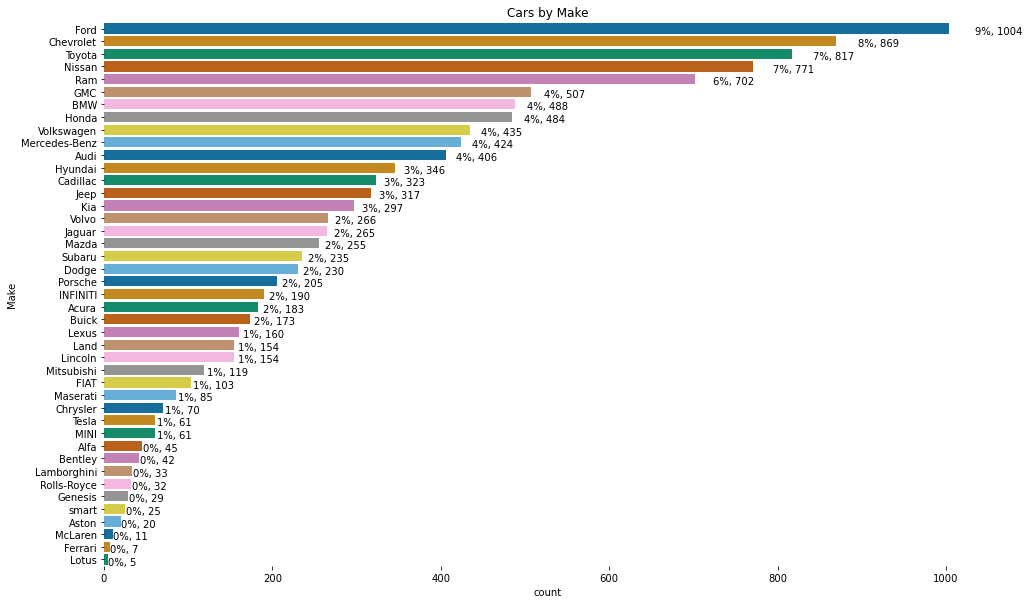

In [60]:
fig = plt.figure(figsize = (35,10))
ax = fig.add_subplot(1, 2, 1)

sns.countplot(y=df['Make'], order = df['Make'].value_counts().index, palette='colorblind')
show_values_on_horizontal_bars(ax,df)
sns.despine(left=True, bottom=True)
plt.title('Cars by Make')
plt.show()

In [61]:
#observation

#The most crowded car brand is Ford. (9%)
#Lotus has the lowest number of cars (5)
#Brand distribution proves that the data is sourced from US.

#### 2.e.8 - Car Brand vs Sale Price

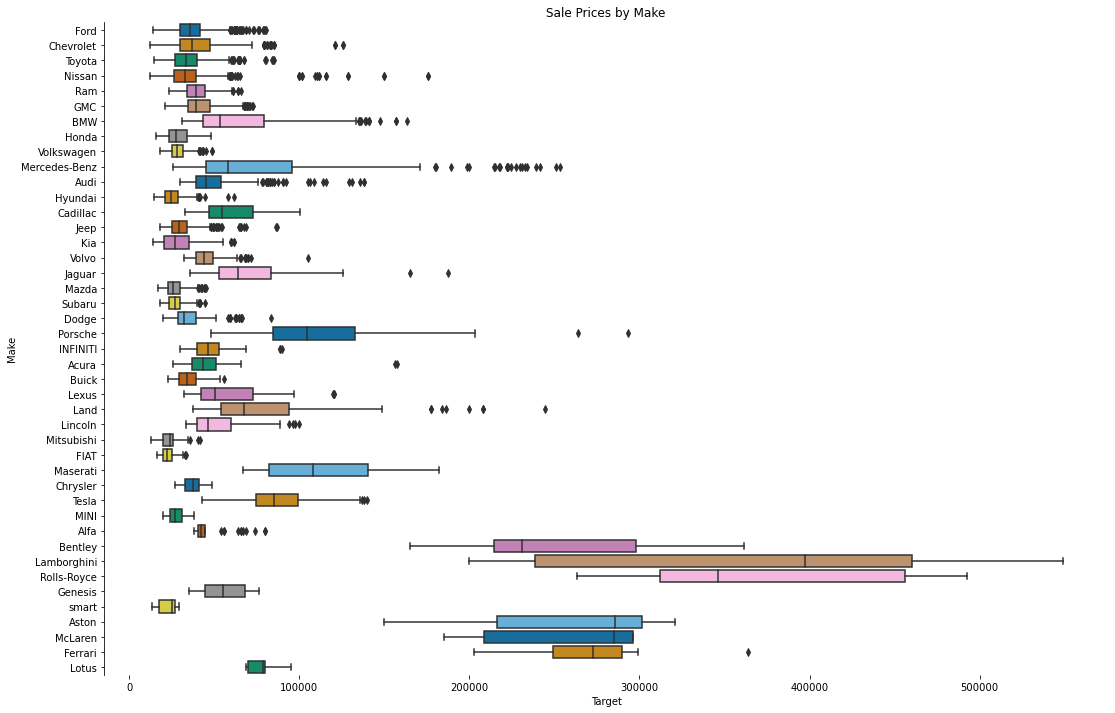

In [62]:
f, ax = plt.subplots(figsize=(18, 12))
fig = sns.boxplot(x="Target", y="Make", data=df,order = df['Make'].value_counts().index, palette='colorblind')
sns.despine(bottom=True)
plt.title('Sale Prices by Make')
plt.show()

In [63]:
#observation

#The most expensive cars are Lamborghini.
#Lamborghini, Porche and Mercedes has the biggest price differences.
#Overall, as the number of cars in the dataset increases, the price margin decreases.

#### 2.e.9 - Correlation between Numerical Variables

In [64]:
#I'm going to create a function to see the correlation heatmap.
#The heatmap will reflect only the highly correlated features (corr score > 0.68)

In [65]:
num_vars = df.columns[df.dtypes !='object']

In [66]:
def find_corr(features):
    corr = features.corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    sns.set_style(style = 'white')
    f, ax = plt.subplots(figsize=(15, 13))
    cmap = sns.diverging_palette(10, 250, as_cmap=True)
    sns.heatmap(corr[(corr >= 0.68) | (corr <= -0.68)], mask=mask, cmap=cmap, 
        square=True,annot=True,vmax=1.0,
        linewidths=.1, cbar_kws={"shrink": .7})
    plt.title('Strongly Correlated Features')

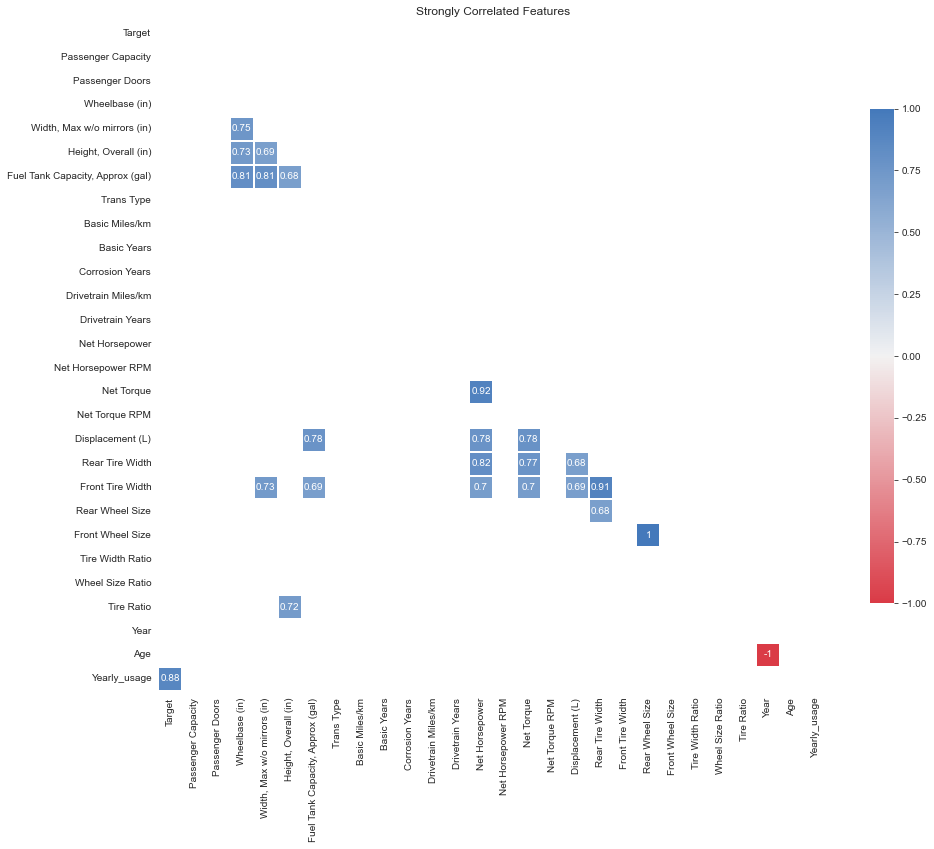

In [67]:
find_corr(df[num_vars])

In [68]:
#observation

#Most correlated columns are Age and Year which is normal that we created Age column by using Year column.
#Net Torque and Horsepower are highly correlated (0.92)
#There are strong correlations with Tire Width features and Horsepower. We can say that car companies 
#make Tire Widths bigger as the Horsepower increases to better help the car move.
#As the car get bigger Tire ratio, wheelbase and fueltank are also getting bigger.

In [69]:
#creating a unique ID for each data point.
df['id'] = range(1, len(df.index)+1)
df.set_index(["Target","id"],inplace=True)

In [70]:
#Now I'm putting aside the current data to compare under/over priced car qualifications in the future 
#since we will soon start to change data.

analysis_df = copy.deepcopy(df)

In [71]:
#Numerical and Categorical features require different preparations before submitting into a ML model.

In [72]:
num_vars = df.columns[df.dtypes !='object']
cat_vars = df.columns[df.dtypes =='object']

### 2.f - Dealing with Numerical Data

#### 2.f.1 - Removing or Keeping Outliers?

In [73]:
#Outliers are normally removed from data before modelling since Linear Regression models 
#are adversely effected by outliers, making the regression lines less accurate in predicting other data.

#But in our case we want to find the cars over or under priced which are outliers from another perspective.
#So, since our goal is to to find outliers, I don't remove them even if it increase error.

In [74]:
#I decided to remove outliers by using Z score at first then decided not to.
#df= df[(np.abs(stats.zscore(df[num_vars])) < 3).all(axis=1)]

#### 2.f.2 - Should We standardise our Numerical data?

In [75]:
#Actually this is similar to the case above. Standardizing numerical values increase model success overall.
#On the other hand our goal is to have most interpretable results. That's why I don't standardise data.

In [76]:
#df[num_vars] = MinMaxScaler().fit_transform(df[num_vars])

In [77]:
#Now we have completed our work with numerical variables.
#I will save the current dataset as dataset_1 since I will be creating more datasets depending on the 
#differences on how categorical variables are treated and the use of dimensionality reduction methods.

In [78]:
import copy
dataset_1 = copy.deepcopy(df)

### 2.g - Dealing with Categorical Data

In [79]:
#ML models accept numerical values. That's why we need to convert our categorical variables into numerical ones.

In [80]:
#Checking the categorical variables before deciding on further actions.
number_of_uniques(df[cat_vars])

,# of Unique,Dtype
Model,416,object
Make,43,object
Suspension Type - Rear,39,object
Suspension Type - Front,24,object
Body Style,21,object
Steering Type,14,object
Fuel System,12,object
Engine Class,11,object
Front Wheel Material,6,object
Engine Configuration,6,object


In [81]:
#observation:

#There are many features with only 2 unique values.
#Some features has lots of unique feature. For instance, Model column holds 416 unique values.

#action:

#We will first convert columns with only 2 unique values into binary numerical format (0/1)
#We will apply binning to remaining columns by manually checking their similarity 
#according to their average Target score.

#### 2.g.1 - Converting Binary Categorical Features into Binary Numerical Format

In [82]:
#Finding columns with two unique values.
two = [cat_vars for cat_vars in df if len(df[cat_vars].unique())==2]
#Creating the function to convert these columns into numerical format.
binary={'Yes':1,'No':0}
bine = lambda col: [binary [item] for item in col]
#Applying the function to the columns.
df[two] = df[two].apply(bine)

In [83]:
df.reset_index(inplace=True)
df.set_index("id",inplace=True)

#### 2.g.2 - Binning features, followed by one-hot encoding

In [84]:
#We will group similar sub-features together based on their similarity and the similarity will be observed
#based on their average Target score (Sale Price).

#I build a features_vs_target function to help us recognize similarities between sub-features.

In [85]:
def features_vs_target(feature,df=df,target="Target"):
    pivot = pd.pivot_table(df,index=[feature],values=[target],aggfunc={target:["mean","count"]})[target]
    pivot.rename(columns={"mean": "Sales Price (Avg)","count":"Count"},inplace=True)
    pivot["Sales Price (Avg)"] = pivot["Sales Price (Avg)"].astype('int')
    return pivot.sort_values(by=["Sales Price (Avg)"],ascending=False)  

In [86]:
#Corrosion Miles/km Column

In [87]:
features_vs_target("Corrosion Miles/km")

,Count,Sales Price (Avg)
Corrosion Miles/km,,
"50,000",415,84331
Unlimited,8682,47538
"100,000",2305,37103
"60,000",6,26580


In [88]:
#observation:

#60,000 exist only 6 times.

#action:

#I will merge 60,000 with 100,000.

In [89]:
df["Corrosion Miles/km"].replace(["60,000"],["100,000"], inplace=True)

In [90]:
#drivetrain

In [91]:
features_vs_target("Drivetrain")

,Count,Sales Price (Avg)
Drivetrain,,
All Wheel Drive,2826,59347
Rear Wheel Drive,3162,55973
Four Wheel Drive,1975,45251
Rear wheel drive,16,42739
Front Wheel Drive,3429,28768


In [92]:
#observation:

#There are two Rear Wheel Drive columns.

#action:

#I will merge them.

In [93]:
df["Drivetrain"].replace(["Rear wheel drive"],["Rear Wheel Drive"], inplace=True)

In [94]:
#Engine Configuration

In [95]:
features_vs_target("Engine Configuration")

,Count,Sales Price (Avg)
Engine Configuration,,
W,25,226484
E,151,58314
V,6276,55898
H,341,53268
I,4613,32495
l,2,25322


In [96]:
#observation:

#E, V and H have similar Avg Sales Prices.
#There is probably a typo; I and l

#action:

#I will group E,V and H together.
#I will group I and l together.

In [97]:
df["Engine Configuration"].replace(["I","E","H"],["l","V","V"], inplace=True)

In [98]:
#Front Wheel Material

In [99]:
features_vs_target("Front Wheel Material")

,Count,Sales Price (Avg)
Front Wheel Material,,
Forged Aluminum,395,105340
Chrome,2,57807
Carbon Fibre,3,54291
Aluminum,9178,47488
Styled Steel,513,32776
Steel,1317,29503


In [100]:
#observation:

#There are only 2 and 3 samples from Chrome and Carbon Fibre.
#Styled Steel and Steel are similar both for Avg Sales Price and materially.

#action:

#I will group Chrome, Carbone Fibre and Aluminum together.
#I will group Styled Steel and Steel together.

In [101]:
df["Front Wheel Material"].replace(["Chrome","Carbon Fibre","Styled Steel"],["Aluminum","Aluminum","Steel"], inplace=True)

In [102]:
#Engine Class

In [103]:
features_vs_target("Engine Class")

,Count,Sales Price (Avg)
Engine Class,,
Twin,873,110437
Premium,913,71132
Electric,151,58314
Supercharger,101,57680
Gas,930,46515
Intercooled,2671,44745
Gas/Ethanol,590,42048
Gas/Electric,370,36193
Turbocharged,334,35753


In [104]:
#action:

#I will group Engines together depending on Sales Price (Avg) of <30k, <40k, <60k, <100k and 100k+

In [105]:
df["Engine Class"].replace(["Compressed","Gas/Electric","Turbocharged","Gas/Ethanol","Gas","Supercharger"],["Regular","Regular","Regular","Intercooled","Intercooled","Electric"], inplace=True)

In [106]:
#Fuel System

In [107]:
features_vs_target("Fuel System")

,Count,Sales Price (Avg)
Fuel System,,
Hydrogen,5,58893
SIDI,48,56135
Gasoline Direct Injection,4455,54168
Sequential MPI (injection),7,48185
Port/Direct Injection,474,48038
DI,4,47945
Diesel Direct Injection,296,47940
MPI,218,46733
Direct Injection,1334,43781


In [108]:
#observation

#There are two Sequential MPI sub-features.
#There are two Electronic Fuel Injection sub-features.
#Some sub-features like Hydrojen, DI, SIDI has small number of samples.

#action

#I will combine two Sequential MPI sub-features.
#I will combine two Electronic Fuel Injection sub-features.
#I will merge sub-features with small number of samples with other features with big number of samples.

In [109]:
df["Fuel System"].replace(["Hydrogen","SIDI","Sequential MPI (injection)","DI","Diesel Direct Injection","MPI","Electronic Fuel Injection","Electronic fuel injection"],["Gasoline Direct Injection","Gasoline Direct Injection","Port/Direct Injection","Port/Direct Injection","Port/Direct Injection","Port/Direct Injection","Sequential MPI","Sequential MPI"], inplace=True)

In [110]:
#Steering Type

In [111]:
features_vs_target("Steering Type")

,Count,Sales Price (Avg)
Steering Type,,
4-Wheel Pwr Rack & Pinion,1,91795
Electric Power Steering,14,51045
Pwr Rack & Pinion,536,49368
Rack-Pinion,9016,47693
Pwr,639,44144
Re-Circulating Ball,556,42764
Electric Rack-&-Pinion,32,42204
Electric Rack & Pinion,514,39018
Electric Variable-Effort Power,7,38500


In [112]:
#observation:

#There are some typos detected. Like Electric Rack-&-Pinion / Electric Rack & Pinion
#There are some sub-features with small number of samples.

#action:

#I will group them all into two: Rack-Pinion, Electric Rack & Pinion

In [113]:
df["Steering Type"].replace(["4-Wheel Pwr Rack & Pinion","Pwr Rack & Pinion","Pwr","Pwr Rack-&-Pinion","Electric Power Steering","Re-Circulating Ball","Electric Rack-&-Pinion","Electric Variable-Effort Power","Electric Pwr","Pwr Electric Assist","Electric","Electric Pwr Steering"],['Rack-Pinion','Rack-Pinion','Rack-Pinion','Rack-Pinion','Rack-Pinion',"Electric Rack & Pinion","Electric Rack & Pinion","Electric Rack & Pinion","Electric Rack & Pinion","Electric Rack & Pinion","Electric Rack & Pinion","Electric Rack & Pinion"], inplace=True)

In [114]:
#Body Style

In [115]:
features_vs_target("Body Style")

,Count,Sales Price (Avg)
Body Style,,
Convertible,607,80610
2dr Car,842,71667
Extended Cab Pickup - Short Bed,3,49508
Station Wagon,7,48810
4dr Car,3578,45608
Sport Utility,3262,43902
Crew Cab Pickup - Standard Bed,718,42880
Crew Cab Pickup - Long Bed,225,42126
Crew Cab Pickup - Short Bed,559,39484


In [116]:
#observation:

#It was easy to group sub-features together when there are a few sub-features. But now we have more 
#number of sub-features to deal with.

#action:

#I will create a function to ease the grouping. 

In [117]:
#The function will automate binning when applied to a feature.
def group_categorical(column):
    g=features_vs_target(column)
    g.reset_index(inplace=True)
    temporary_df = pd.merge(df,g,how ='left',on=column)
    temporary_df[column] = ['<28k_body_style' if x<28000 else '<40k_body_style' if x<40000 
                                  else '<50k_body_style' if x<50000 else '50k+_body_style' 
                                  for x in temporary_df['Sales Price (Avg)']]
    df[column] = temporary_df[column].values

In [118]:
group_categorical("Body Style")
df["Body Style"].unique()

array(['<50k_body_style', '50k+_body_style', '<40k_body_style',
       '<28k_body_style'], dtype=object)

In [119]:
#Suspension Type - Front

In [120]:
features_vs_target("Suspension Type - Front")

,Count,Sales Price (Avg)
Suspension Type - Front,,
Double Wishbone Pushrod,18,459627
Double Wishbone,2585,70130
Short/Long Arm,106,67144
Multi-Link,692,63656
Independent SLA,1,63600
Coil-Over Shock,68,58545
Coil springs,6,52945
HiPer Strut,62,51263
Magnetic Ride Control,5,49626


In [121]:
#action:

#I will use group_categorical function for binning.

In [122]:
def group_categorical(column):
    g=features_vs_target(column)
    g.reset_index(inplace=True)
    temporary_df = pd.merge(df,g,how ='left',on=column)
    temporary_df[column] = ['<39k_suspension_front' if x<39000 else '<45k_suspension_front' if x<45000 
                                  else '<65k_suspension_front' if x<65000 else '<71k_suspension_front' if x<71000
                                  else '71k+_suspension_front' 
                                  for x in temporary_df['Sales Price (Avg)']]
    df[column] = temporary_df[column].values

In [123]:
group_categorical("Suspension Type - Front")
df["Suspension Type - Front"].unique()

array(['<39k_suspension_front', '<71k_suspension_front',
       '<65k_suspension_front', '<45k_suspension_front',
       '71k+_suspension_front'], dtype=object)

In [124]:
#Suspension Type - Rear

In [125]:
features_vs_target("Suspension Type - Rear")

,Count,Sales Price (Avg)
Suspension Type - Rear,,
Double Wishbone Pushrod,18,459627
Trailing Link,13,151426
5-Link,98,74644
Short/Long Arm,100,68392
Independent multi-link,1,63600
Independent Five-Link,5,63263
Double Wishbone,729,61269
Independent Multi-Link,49,58483
Independent,35,57637


In [126]:
#action

#I will use group_categorical function for binning.

In [127]:
def group_categorical(column):
    g=features_vs_target(column)
    g.reset_index(inplace=True)
    temporary_df = pd.merge(df,g,how ='left',on=column)
    temporary_df[column] = ['<30k_suspension_rear' if x<30000 else '<42k_suspension_rear' if x<42000 
                                  else '<51k_suspension_rear' if x<51000 else '<75k_suspension_rear' if x<75000
                                  else '75k+_suspension_rear' 
                                  for x in temporary_df['Sales Price (Avg)']]
    df[column] = temporary_df[column].values

In [128]:
group_categorical("Suspension Type - Rear")
df["Suspension Type - Rear"].unique()

array(['<51k_suspension_rear', '<42k_suspension_rear',
       '<75k_suspension_rear', '<30k_suspension_rear',
       '75k+_suspension_rear'], dtype=object)

In [129]:
#Make

In [130]:
features_vs_target("Make")

,Count,Sales Price (Avg)
Make,,
Rolls-Royce,32,376823
Lamborghini,33,360296
Ferrari,7,273879
Aston,20,259491
McLaren,11,251540
Bentley,42,247736
Porsche,205,114012
Maserati,85,112463
Tesla,61,89152


In [131]:
#action

#I will use group_categorical function for binning.

In [132]:
def group_categorical(column):
    g=features_vs_target(column)
    g.reset_index(inplace=True)
    temporary_df = pd.merge(df,g,how ='left',on=column)
    temporary_df[column] = ['<30k_make' if x<30000 else '<40k_make' if x<40000 
                                  else '<50k_make' if x<50000 else '<64k_make' if x<64000
                                  else '<90k_make' if x<90000
                                  else '90k+_make' 
                                  for x in temporary_df['Sales Price (Avg)']]
    df[column] = temporary_df[column].values

In [133]:
group_categorical("Make")
df["Suspension Type - Rear"].unique()

array(['<51k_suspension_rear', '<42k_suspension_rear',
       '<75k_suspension_rear', '<30k_suspension_rear',
       '75k+_suspension_rear'], dtype=object)

In [134]:
#Model

In [135]:
features_vs_target("Model")

,Count,Sales Price (Avg)
Model,,
Phantom,13,466772
Aventador,18,459627
812 Superfast,1,363730
Dawn,3,342533
Cullinan,1,325000
Mulsanne,9,320437
Ghost,10,311342
Wraith,5,304855
Martin Vanquish,12,299447


In [136]:
#observation:

#Model column has more than 400 unique values. The highest we have ever seen.

#action:

#I will modify group_categorical to answer the high number of unique values.
#New function will divide Sales Price (Avg) above into 18 sub-groups and bin accordingly.

In [137]:
def group_categorical(column):
    g=features_vs_target(column)
    k=pd.cut(g['Sales Price (Avg)'], 18)
    k=k.to_frame()
    k.reset_index(inplace=True)
    temporary_df = pd.merge(df,k,how ='left',on=column)
    df[column] = temporary_df['Sales Price (Avg)'].values

In [138]:
group_categorical("Model")
df["Model"] = df["Model"].astype('object')

In [139]:
#Looking at the unique number of values columns hold after binning.

In [140]:
number_of_uniques(df[cat_vars])

,# of Unique,Dtype
Model,15,object
Make,6,object
Suspension Type - Rear,5,object
Engine Class,5,object
Suspension Type - Front,5,object
Body Style,4,object
Drivetrain,4,object
Fuel System,4,object
Engine Configuration,3,object
Corrosion Miles/km,3,object


In [141]:
df.reset_index(inplace=True)
df.set_index(["Target","id"],inplace=True)

In [142]:
#Now second dataset creation has completed. I save it aside.

In [143]:
dataset_2 = copy.deepcopy(df)

#### 2.g.3 - One-hot encoding

In [144]:
#Applying one-Hot encoding for both dataset_1 and dataset_2

In [145]:
cat_vars = dataset_1.columns[dataset_1.dtypes =='object']
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    dataset_1 = pd.concat([dataset_1.drop(var, axis=1), pd.get_dummies(dataset_1[var], prefix=var, prefix_sep='_')], axis=1)

In [146]:
cat_vars = dataset_2.columns[dataset_2.dtypes =='object']
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    dataset_2 = pd.concat([dataset_2.drop(var, axis=1), pd.get_dummies(dataset_2[var], prefix=var, prefix_sep='_')], axis=1)


In [147]:
#converting Model column names into more readable format
dataset_2.rename(columns={"Model_(341241.722, 366347.778]": "Model_segment_1", "Model_(316135.667, 341241.722]": "Model_segment_2","Model_(291029.611, 316135.667]": "Model_segment_3", "Model_(265923.556, 291029.611]": "Model_segment_4","Model_(240817.5, 265923.556]": "Model_segment_5", "Model_(215711.444, 240817.5]": "Model_segment_6","Model_(190605.389, 215711.444]": "Model_segment_7", "Model_(165499.333, 190605.389]": "Model_segment_8","Model_(140393.278, 165499.333]": "Model_segment_9", "Model_(115287.222, 140393.278]": "Model_segment_10","Model_(90181.167, 115287.222]": "Model_segment_11", "Model_(65075.111, 90181.167]": "Model_segment_12","Model_(39969.056, 65075.111]": "Model_segment_13", "Model_(14411.091, 39969.056]": "Model_segment_14","Model_(441665.944, 466772.0]": "Model_segment_15"},inplace=True)

In [148]:
datasets =[dataset_1,dataset_2]

#Seperating Dependent variable from Independent ones.
for i in datasets:
    i.reset_index(inplace=True)
    i.set_index(["id"],inplace=True)
    y = i[["Target"]]
    i.drop(columns=["Target"],inplace=True)

### 2.h - Dimensionality Reduction

In [149]:
#observation:

#There are too many features both in dataset_1 and in dataset_2.
#Having too many features can make the model inefficient. 

#action:

#I will create different datasets based on their demensionality reduction technique.
#I will use two different feature selection technique; SelectKBest Algorithm and Lasso.
#At the end there will be 6 different datasets.

#### 2.h.1 - Feature Selection by using SelectKBest Algorithm

In [150]:
#SelectKBest Algorithm selects the most powerful features on the target value.
#I build a function to apply it on our datasets.

In [151]:
def best_feature_select(data,k):    
    feature_names = data.columns
    selector = SelectKBest(score_func=f_regression,k=k)
    print("Original feature shape:", data.shape)
    new_X = selector.fit_transform(data, y)
    print("Transformed feature shape:", new_X.shape)
    mask = selector.get_support() 
    new_features = [] # The list of your K best features
    for bool, feature in zip(mask, feature_names):
        if bool:
            new_features.append(feature)
    new_df = pd.DataFrame(new_X, columns=new_features)    
    return new_df
        

In [152]:
#Defaul k is 10 for SelectKBest.
#I will pick k=20 for dataset_1 and k=40 for dataset_2 number of features they have taken into consideration.
## I apply best_feature_select function to both dataset_1 and dataset_2 to create dataset_3 and dataset_4.

In [153]:
print("For dataset_1")
dataset_3 = best_feature_select(dataset_1,20)
print("-----------------")
print("For dataset_2")
dataset_4 = best_feature_select(dataset_2,40)

For dataset_1
Original feature shape: (11408, 664)
Transformed feature shape: (11408, 20)
-----------------
For dataset_2
Original feature shape: (11408, 104)
Transformed feature shape: (11408, 40)


#### 2.h.2 - Dimensionality Reduction by using Lasso 

In [154]:
#The Lasso method regularizes model parameters by shrinking the regression coefficients, reducing 
#some of them to zero. So it can be used as a feature selector.

#I build a lasso_feature_select function.

In [155]:
def lasso_feature_select(data):
    print("Original feature shape:", data.shape)
    lasso = Lasso()
    lasso.fit(data,y)
    n=data.iloc[:,lasso.coef_!=0]
    print("Lasso applied feature shape:", n.shape)
    return n

In [156]:
# I apply lasso_feature_select function to both dataset_1 and dataset_2 to create dataset_5 and dataset_6.

In [157]:
print("For dataset_1")
dataset_5 = lasso_feature_select(dataset_1)
print("-----------------")
print("For dataset_2")
dataset_6 = lasso_feature_select(dataset_2)

For dataset_1
Original feature shape: (11408, 664)
Lasso applied feature shape: (11408, 473)
-----------------
For dataset_2
Original feature shape: (11408, 104)
Lasso applied feature shape: (11408, 92)


In [158]:
#Now that all our datasets are ready.

In [159]:
datasets = [dataset_1,dataset_2,dataset_3,dataset_4,dataset_5,dataset_6]

# 3- Modelling

### 3.a - Building Success Evaluation Function and Applying Linear Regression with Cross-Validation

In [160]:
#I will build a function which applies Linear Regression with cross-validation to our datasets and 
#compare the results under one table.

In [161]:
def find_error_ratios(datasets):
    global y
    lm = LinearRegression()
    
    table = pd.DataFrame(columns=["Ratio of cars predicted with max %10 error",
                    "Ratio of cars predicted with max %15 error","Ratio of cars predicted with max %25 error"],
                    index=["Dataset_1","Dataset_2","Dataset_3","Dataset_4","Dataset_5","Dataset_6"])

    dataset = 0

    for k in datasets:

        X = np.array(k)
        y = np.array(y)

        skf = KFold(n_splits=5)
        preds = [0]*len(X)

        for train_index, test_index in skf.split(X, y): 
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            lm.fit(X_train, y_train)
            y_pred = lm.predict(X_test)
            c = 0
            for i in test_index:
                preds[i]= y_pred[c]
                c += 1


        k['Actual Price'] = y
        k['Predicted Price'] = preds

        k['Actual Price'] = k['Actual Price'].astype('int')
        k['Predicted Price'] = k['Predicted Price'].astype('int')

        k["Error_Ratio"] = (k['Actual Price'] - k['Predicted Price'])*100/k['Actual Price']

        group1= k[(k["Error_Ratio"] < 10) & (k["Error_Ratio"] > -10) ].Error_Ratio.count()*100 /len(k)
        group2= k[(k["Error_Ratio"] < 15) & (k["Error_Ratio"] > -15) ].Error_Ratio.count()*100 /len(k)
        group3= k[(k["Error_Ratio"] < 25) & (k["Error_Ratio"] > -25) ].Error_Ratio.count()*100 /len(k)


        table["Ratio of cars predicted with max %10 error"][dataset] = group1
        table["Ratio of cars predicted with max %15 error"][dataset] = group2
        table["Ratio of cars predicted with max %25 error"][dataset] = group3

        dataset += 1
        
    return table

### 3.b - Finding the winner dataset

In [162]:
find_error_ratios(datasets)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Ratio of cars predicted with max %10 error,Ratio of cars predicted with max %15 error,Ratio of cars predicted with max %25 error
Dataset_1,16.207924,23.115358,33.72195
Dataset_2,55.101683,73.080295,91.164095
Dataset_3,33.082048,47.580645,72.080996
Dataset_4,39.463534,56.653226,80.119215
Dataset_5,28.076788,40.559257,60.799439
Dataset_6,55.566269,73.387097,91.733871


In [163]:
#Dataset_6 is slightly better than Dataset_2 which makes it our winner.
#Remember that Dataset_6 is Lasso applied version of Dataset_2.

#According to the results; ≈56% of all cars are predicted with at most 10% error from its actual price
#and ≈92% of all cars are predicted with at most 25% error.

# 4- Analysing Results

In [164]:
#Coefficients are needed to see how each feature effects the Target (Sale Price).

### 4.a - Coefficient Analysis

In [165]:
lm = LinearRegression()
lm.fit(dataset_6.iloc[:,:-3],y)

coefs= lm.coef_[0]
features= dataset_6.iloc[:,:-3].columns

coefs = pd.DataFrame(coefs)
features = pd.DataFrame(features)

coef_table = pd.concat([features, coefs], axis=1, sort=False)
coef_table.columns = ["Features","Coefficient"]
coef_table["Coefficient"] = coef_table["Coefficient"].astype('int')
coef_table["Coef_abs"] = abs(coef_table["Coefficient"])
coef_table.sort_values(by="Coef_abs",ascending=False)

,Features,Coefficient,Coef_abs
91,Model_segment_15,205605,205605
77,Model_segment_14,-96400,96400
78,Model_segment_13,-95227,95227
90,Model_segment_1,88574,88574
79,Model_segment_12,-84725,84725
80,Model_segment_11,-73582,73582
89,Model_segment_2,70455,70455
88,Model_segment_3,69438,69438
81,Model_segment_10,-57876,57876
87,Model_segment_4,45853,45853


In [166]:
#Before talking about the coefficients it is best to mention the meaning of coefficint scores;
#Coefficient scores can be interpreted as how the dependent variable get changes if 
#1 unit increase happens in the independent variable.

#So if we increase each feature by 1 in our model the sale price will be most effected by the features below:

#Model Related Features
#Night Vision 
#Engine Configuration Type
#Suspension Type
#Having rollover protection bars
#Make
#Corrosion Miles/Km

### 4.b - Finding the Over/Under priced cars

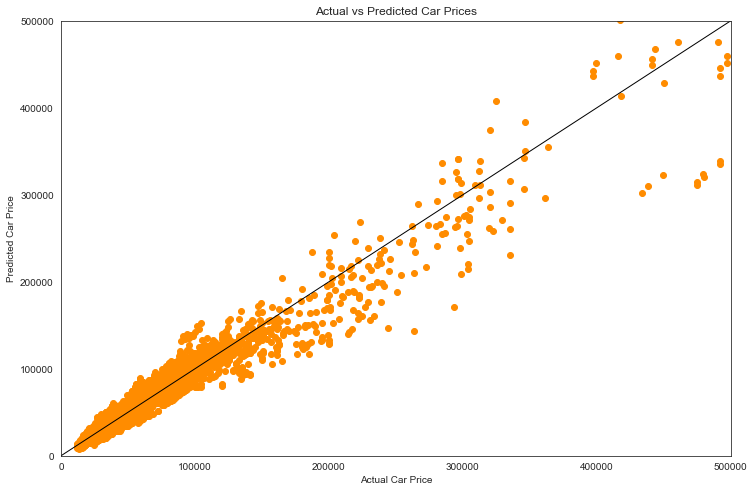

In [167]:
#An overlook into predicted vs original car prices

plt.figure(figsize=(12,8))
plt.scatter(dataset_6["Actual Price"], dataset_6["Predicted Price"], color='darkorange')
plt.plot([0,500000],[0,500000], 'black', linewidth=1)
plt.xlabel("Actual Car Price")
plt.ylabel("Predicted Car Price")
plt.title("Actual vs Predicted Car Prices")
plt.xlim(0, 500000)
plt.ylim(0, 500000)
plt.show()

In [168]:
#observation:

#It can be seen that model's tendency to label cars as overpiced increases as the cars' value increase.

In [169]:
#The model will label cars as Underpriced if their predicted value is at least 25% higher than their Sale Price.
#The model will label cars as Overpriced if their predicted value is at least 25% lower than their Sale Price.

dataset_6["Error_deviation"] = ['Underpriced Cars' if x<-25 else 'Non-Outlier Cars' if x<25 else 'Overpriced Cars' for x in dataset_6["Error_Ratio"]]
dataset_6["Error_deviation"].value_counts()

Non-Outlier Cars    10465
Underpriced Cars      635
Overpriced Cars       308
Name: Error_deviation, dtype: int64

In [170]:
#observation:

#There are 635 (5.5%) underpriced cars and there are 308(2.7%) overpriced cars.

### 4.c - Comparing the Over/Under priced cars

In [171]:
#The best way to understand why underpriced cars are underpriced and overpriced ones are overpriced is to
#compare their qualifications.

In [172]:
#Preparing data to compare overpriced/underpriced cars

analysis = pd.merge(analysis_df,dataset_6[["Error_deviation"]],how ='left',on='id')
remove= analysis[analysis["Error_deviation"]=="Non-Outlier Cars"].index
analysis.drop(remove,inplace=True)

In [173]:
#Building a function to compare overpriced/underpriced cars over categocial features easier

def underpriced_vs_overpriced_cat(feature,df=analysis,target="Error_deviation"):
    t=pd.crosstab(df[feature],df["Error_deviation"])
    t["Overpriced Cars %"] = (t['Overpriced Cars'] / t['Overpriced Cars'].sum()) * 100
    t["Underpriced Cars %"] = (t['Underpriced Cars'] / t['Underpriced Cars'].sum()) * 100
    t["Overpriced Cars %"] = t["Overpriced Cars %"].astype("int")
    t["Underpriced Cars %"] = t["Underpriced Cars %"].astype("int")
    t.drop(columns=['Overpriced Cars','Underpriced Cars'],inplace=True)
    
    return t  

In [174]:
#Sharpest distinctions between Overpriced and Underpriced cars by features can be found below.
#Check Appendix to see the comparison of remaining features.

In [175]:
underpriced_vs_overpriced_cat("Age")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Age,,
3,25,16
4,32,12
6,17,12
7,15,20
8,8,38


In [176]:
#observation:

#Newer cars are more tend to be Overpriced than older cars. Potential reasons could be;
    #Newer cars don't have an established market yet.
    #Older car owners are more willingness to sell cheaper to close the deal quickly.

In [177]:
underpriced_vs_overpriced_cat("Drivetrain")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Drivetrain,,
All Wheel Drive,13,11
Four Wheel Drive,2,17
Front Wheel Drive,43,24
Rear Wheel Drive,39,45
Rear wheel drive,0,1


In [178]:
#observation:

#Overpriced cars have more tendency to have Front Whell Drive.
#Underpriced cars have much more tendency to have Four Whell Drive than Overpriced cars. A potential reason can be;
    # Some Front wheel drive car owners think that it is premium and should be priced higher but it may not be 
    # an generally accepted approach by sellers.

In [179]:
underpriced_vs_overpriced_cat("Body Style")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Body Style,,
2dr Car,11,18
3dr Car,0,0
4dr Car,52,25
Convertible,18,9
Crew Cab Pickup - Long Bed,0,2
Crew Cab Pickup - Short Bed,1,0
Crew Cab Pickup - Standard Bed,0,3
Extended Cab Pickup - Long Bed,0,6
Extended Cab Pickup - Standard Bed,0,5


In [180]:
#observation:

#Overpriced cars have much more tendency to have 4dr Car Body Style than Underpriced cars.

In [181]:
underpriced_vs_overpriced_cat("Fuel System")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Fuel System,,
Diesel Direct Injection,3,1
Direct Injection,7,17
Electronic Fuel Injection,5,9
Gasoline Direct Injection,47,27
Hydrogen,1,0
MPI,9,0
Port/Direct Injection,0,0
Sequential MPI,23,42


In [182]:
#observation:

#Overpriced cars's possibility to have Gasoline Direct Injection is much higher than Underpriced Cars
#and it is same on Sequential MPI for Underpriced Cars.

In [183]:
underpriced_vs_overpriced_cat("Engine Configuration")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Engine Configuration,,
E,4,0
H,3,1
I,59,29
V,32,68
W,0,0
l,0,0


In [184]:
#observation:

#Overpriced cars' possibility to have Engine Configuration of I is ≈60%
#Underpriced cars' possibility to have Engine Configuration of V is ≈68%

In [185]:
#The ones above were the categorical features. Now I will build a function to look into numerical features.

In [186]:
#Building a function to compare overpriced/underpriced cars over numerical features easier

def underpriced_vs_overpriced_num(feature,df=analysis,target="Error_deviation"):
    t= pd.pivot_table(analysis,index=["Error_deviation"],values=[feature],aggfunc=np.mean)
    t[feature] = t[feature].astype("int")
    return t  

In [187]:
underpriced_vs_overpriced_num("Net Horsepower")

,Net Horsepower
Error_deviation,
Overpriced Cars,244
Underpriced Cars,335


In [188]:
#Underpriced cars have ≈38% more horsepower than Overpriced cars. 

In [189]:
underpriced_vs_overpriced_num("Yearly_usage")

,Yearly_usage
Error_deviation,
Overpriced Cars,13604
Underpriced Cars,8280


In [190]:
#observation:

#We assumed that Basic Miles/Km column represents total miles/km made by the car before creating 
#the Yearly_usage column, later we understood that Basic Miles/Km doesn't represent it.
#So we need to learn from our client what it stands for.

In [191]:
underpriced_vs_overpriced_num("Net Torque")

,Net Torque
Error_deviation,
Overpriced Cars,250
Underpriced Cars,344


In [192]:
#observation:

#Net Torque feature has a strong correlation with horsepower.
#So it is very normal to similar results as the horsepower above.

In [193]:
underpriced_vs_overpriced_num("Fuel Tank Capacity, Approx (gal)")

,"Fuel Tank Capacity, Approx (gal)"
Error_deviation,
Overpriced Cars,16
Underpriced Cars,21


In [194]:
#observation:

#Underpriced cars have 30% bigger Fuel tank capacity than Overpriced cars.

In [195]:
underpriced_vs_overpriced_num("Basic Miles/km")

,Basic Miles/km
Error_deviation,
Overpriced Cars,53136
Underpriced Cars,41946


In [196]:
#observation:

#We assumed that Basic Miles/Km column represents total miles/km made by the car at the beginning. 
#Later we realized that Basic Miles/Km doesn't represent it.
#So we need to learn from our client what it stands for.

In [197]:
underpriced_vs_overpriced_num("Age")

,Age
Error_deviation,
Overpriced Cars,4
Underpriced Cars,6


In [198]:
#observation:

#Overpriced cars are younger than Underpriced cars. Potential reasons could be:
    #Newer cars don't have an established market yet.
    #Older car owners are more willingness to sell cheaper to close the deal quickly.

In [199]:
underpriced_vs_overpriced_cat("Make")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Make,,
Alfa,0,0
Audi,0,0
BMW,6,0
Bentley,1,0
Buick,0,0
Cadillac,3,0
Chevrolet,9,17
Chrysler,0,0
Dodge,0,11


In [200]:
#observation:

#Chevrolet, Dodge and Ford (U.S brands) are more tend to be overpriced.
#Toyota, Mazda and Hyundai (imported brands) are more tend to be underpriced. A potential reason could be;
    # Local produced car sold cheaper because of the absence of import taxes and logistic costs
    # which has to be paid for imported cars.


### 4.d - Potential benefit of the model for the client

In [201]:
#Our client's main goal was to detect cars under the market value to buy and making profit of the margin.
#So, how much can our client make if they buy the underpriced cars and sell them on market price?

In [202]:
dataset_6["Error"] = dataset_6["Predicted Price"] - dataset_6["Actual Price"]
dataset_6[dataset_6["Error_deviation"]== "Underpriced Cars"].Error.sum()

8429024

In [203]:
# Our client can make ≈8.5M USD from buying and selling ≈600 Underpriced cars.

### 4.e - Future Actions/Recommendations

In [204]:
#Now that we've completed our work and delivered the results to our client.

#I recommend 3 future actions for the benefit of our client in addition to buying cheap and selling for more, 

    # 1- Upgrade/modify cars to sell for higher.
    # By knowing each features’ effect on the final price, smart modifications can be made to increase sale price. 
    # (For instance; fitting a Night Vision system)

    # 2- Create an alert system
    # Creating an alarming system that will notify the client whenever an underpriced car is listed online 
    # can help our client to act quickly, stay ahead of competition and save time.

    # 3- Widen the project scope
    # Working with more data can help to increase model accuracy. These data can be fetched from websites 
    # like autotrader by using web scraping techniques easily and cost efficiently.

# APPENDIX

In [205]:
underpriced_vs_overpriced_cat("Passenger Capacity")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Passenger Capacity,,
2,24,15
3,0,7
4,16,11
5,55,45
6,0,16
7,0,1
8,0,1
12,1,0
15,1,0


In [206]:
underpriced_vs_overpriced_cat("Night Vision")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Night Vision,,
No,97,99
Yes,2,0


In [207]:
underpriced_vs_overpriced_cat("Steering Type")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Steering Type,,
Electric,0,0
Electric Pwr,0,0
Electric Pwr Steering,0,0
Electric Rack & Pinion,2,1
Electric Variable-Effort Power,0,0
Pwr,4,14
Pwr Rack & Pinion,4,11
Rack-Pinion,86,61
Re-Circulating Ball,0,11


In [208]:
underpriced_vs_overpriced_cat("Brakes-ABS")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Brakes-ABS,,
No,3,0
Yes,96,99


In [209]:
underpriced_vs_overpriced_cat("Model")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Model,,
1500,0,0
2500,0,0
300,0,0
5-Series,4,0
500,0,0
500L,0,0
500X,0,0
7-Series,1,0
911,3,0


In [210]:
underpriced_vs_overpriced_cat("Trans Type")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Trans Type,,
1.0,17,5
4.0,1,0
5.0,3,7
6.0,48,54
7.0,12,17
8.0,15,8
9.0,0,5
10.0,0,0


In [211]:
underpriced_vs_overpriced_cat("Engine Class")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Engine Class,,
Compressed,0,0
Electric,4,0
Gas,8,14
Gas/Electric,18,0
Gas/Ethanol,0,9
Intercooled,11,17
Premium,19,11
Regular,20,34
Supercharger,0,2


In [212]:
underpriced_vs_overpriced_cat("Parking Aid")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Parking Aid,,
No,77,75
Yes,22,24


In [213]:
underpriced_vs_overpriced_cat("Parking Aid")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Parking Aid,,
No,77,75
Yes,22,24


In [214]:
underpriced_vs_overpriced_cat("Stability Control")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Stability Control,,
No,0,0
Yes,100,99


In [215]:
underpriced_vs_overpriced_cat("Basic Years")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Basic Years,,
3.0,52,74
4.0,27,15
5.0,19,10


In [216]:
underpriced_vs_overpriced_cat("Rollover Protection Bars")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Rollover Protection Bars,,
No,96,93
Yes,3,6


In [217]:
underpriced_vs_overpriced_cat("Tire Pressure Monitor")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Tire Pressure Monitor,,
No,6,13
Yes,93,86


In [218]:
underpriced_vs_overpriced_cat("Daytime Running Lights")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Daytime Running Lights,,
No,18,17
Yes,81,82


In [219]:
underpriced_vs_overpriced_cat("Air Bag-Passenger Switch (On/Off)")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Air Bag-Passenger Switch (On/Off),,
No,96,87
Yes,3,12


In [220]:
underpriced_vs_overpriced_cat("Front Wheel Material")

Error_deviation,Overpriced Cars %,Underpriced Cars %
Front Wheel Material,,
Aluminum,63,69
Forged Aluminum,9,5
Steel,25,17
Styled Steel,1,7


In [221]:
underpriced_vs_overpriced_num("Tire Ratio")

,Tire Ratio
Error_deviation,
Overpriced Cars,5
Underpriced Cars,5
